In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('D:/Data Sets/E Commerce Dataset.xlsx', sheet_name = 'E Comm')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Data Preprocessing

check for any missing values

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Missing value Imputation

In [6]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
print(df.Tenure.isnull().value_counts())

df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
print(df.WarehouseToHome.isnull().value_counts())

df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
print(df.WarehouseToHome.isnull().value_counts())

df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
print(df.OrderAmountHikeFromlastYear.isnull().value_counts())

df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
print(df.CouponUsed.isnull().value_counts())

df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
print(df.OrderCount.isnull().value_counts())

df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)
print(df.DaySinceLastOrder.isnull().value_counts())


False    5630
Name: Tenure, dtype: int64
False    5630
Name: WarehouseToHome, dtype: int64
False    5630
Name: WarehouseToHome, dtype: int64
False    5630
Name: OrderAmountHikeFromlastYear, dtype: int64
False    5630
Name: CouponUsed, dtype: int64
False    5630
Name: OrderCount, dtype: int64
False    5630
Name: DaySinceLastOrder, dtype: int64


Data Cleaning

In [9]:
df['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'}, inplace=True)

In [11]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Feature Engineering

In [15]:
df['CashbackPerOrder'] = df['CashbackAmount']/df['OrderCount']

In [16]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackPerOrder
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,129.60


In [17]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(exclude='object').columns
num

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'CashbackPerOrder'],
      dtype='object')

In [20]:
cat

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

Univariate Analysis

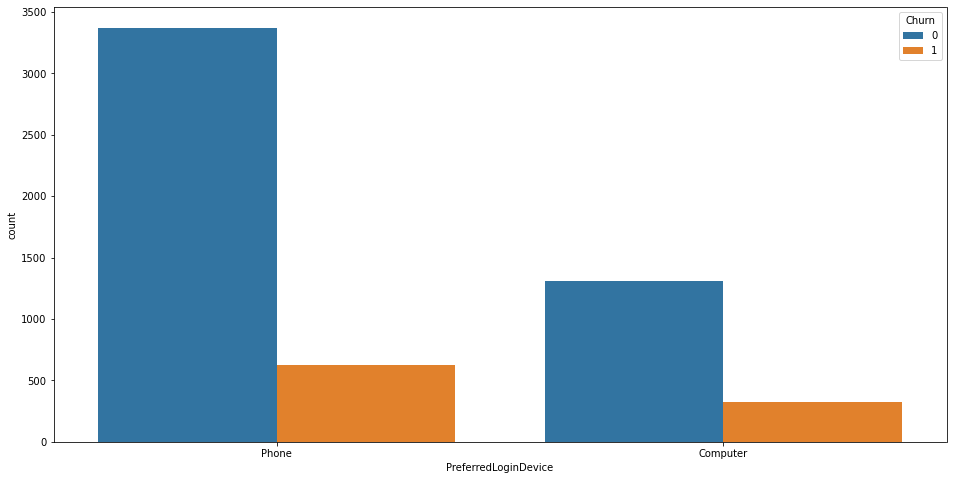

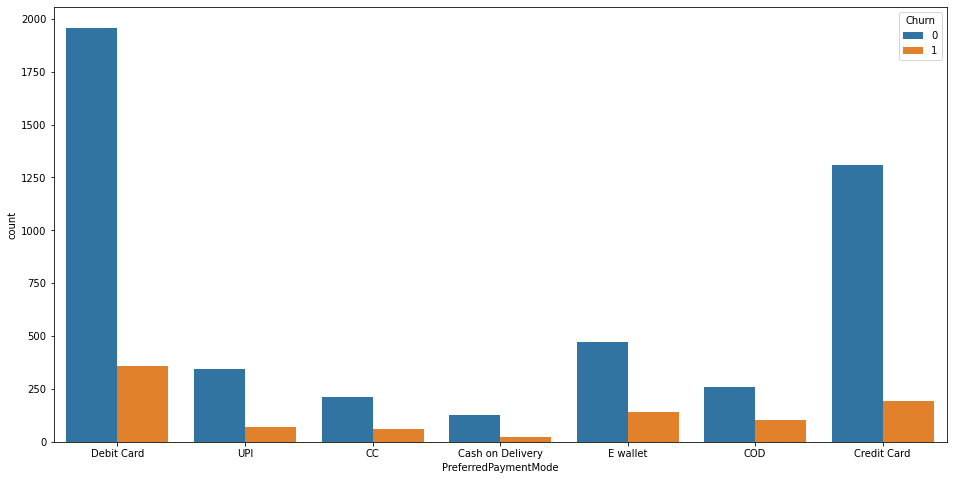

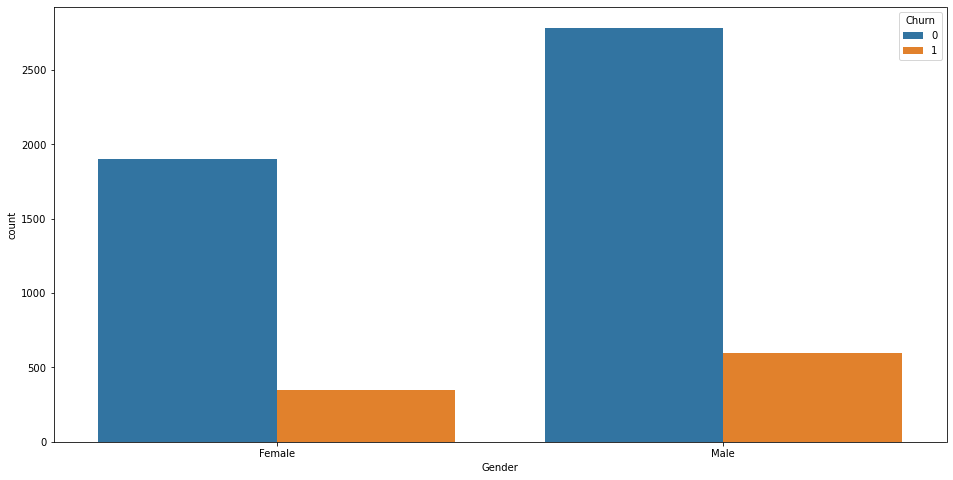

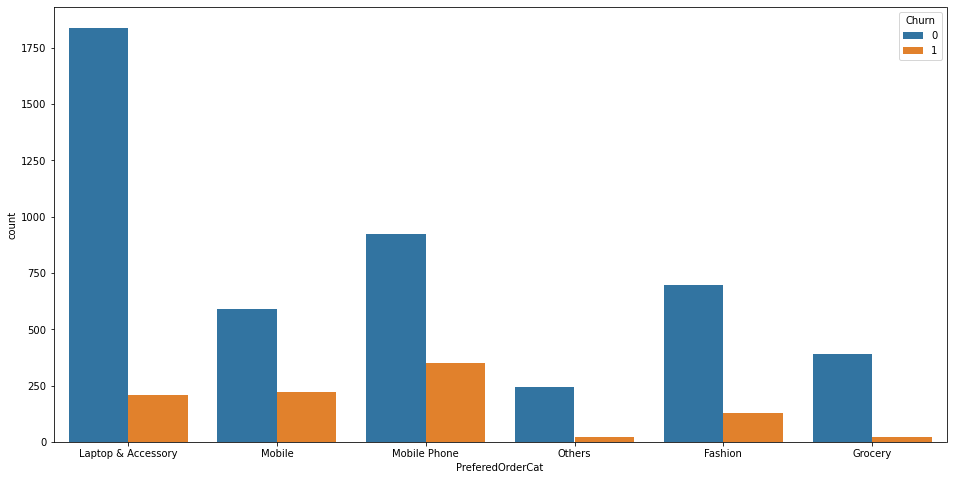

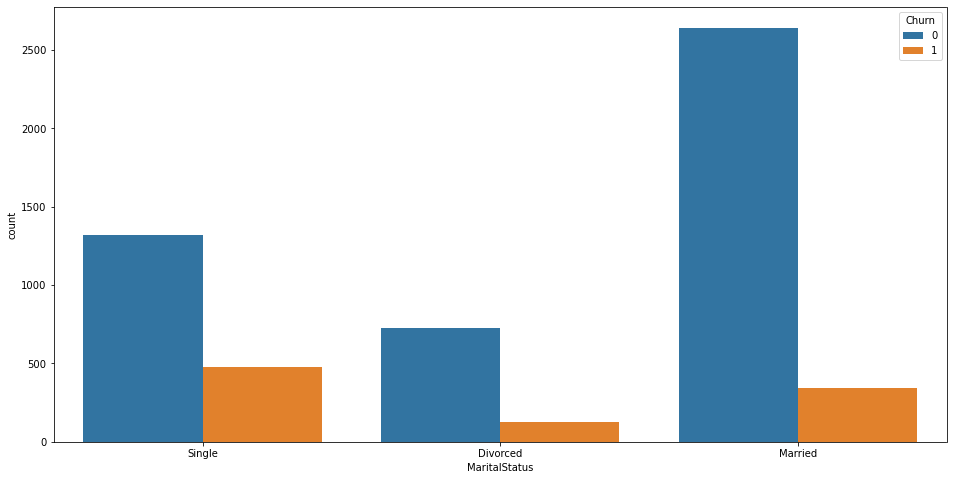

In [18]:
for col in cat:

    fig,ax = plt.subplots(figsize=(16,8))
    sns.countplot(x = df[col], hue=df.Churn)


In [29]:
#percent churned for each variable

df.loc[df.Churn==1]['MaritalStatus'].count()

948

In [41]:
dt = df.copy()

In [50]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in df.select_dtypes(include='object'):

    df[col]=enc.fit_transform(df[col])

In [51]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackPerOrder
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,...,2,2,9,1,11.0,1.0,1.0,5.0,159.93,159.930
1,50002,1,9.0,1,1,8.0,6,1,3.0,4,...,3,2,7,1,15.0,0.0,1.0,0.0,120.90,120.900
2,50003,1,9.0,1,1,30.0,4,1,2.0,4,...,3,2,6,1,14.0,0.0,1.0,3.0,120.28,120.280
3,50004,1,0.0,1,3,15.0,4,1,2.0,4,...,5,2,8,0,23.0,0.0,1.0,3.0,134.07,134.070
4,50005,1,0.0,1,1,12.0,0,1,3.0,3,...,5,2,3,0,11.0,1.0,1.0,3.0,129.60,129.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,0,1,30.0,3,1,3.0,2,...,1,1,6,0,18.0,1.0,2.0,4.0,150.71,75.355
5626,55627,0,13.0,1,1,13.0,3,1,3.0,5,...,5,1,6,0,16.0,1.0,2.0,3.0,224.91,112.455
5627,55628,0,1.0,1,1,11.0,4,1,3.0,2,...,4,1,3,1,21.0,1.0,2.0,4.0,186.42,93.210
5628,55629,0,23.0,0,3,9.0,3,1,4.0,5,...,4,1,4,0,15.0,2.0,2.0,9.0,178.90,89.450


In [74]:
temp = dt.groupby(by=dt.MaritalStatus).Churn.sum()
temp

MaritalStatus
Divorced    124
Married     344
Single      480
Name: Churn, dtype: int64

In [75]:
total = dt.value_counts('MaritalStatus').sort_index()
total

MaritalStatus
Divorced     848
Married     2986
Single      1796
dtype: int64

In [79]:
res = temp/total*100

<AxesSubplot:xlabel='MaritalStatus'>

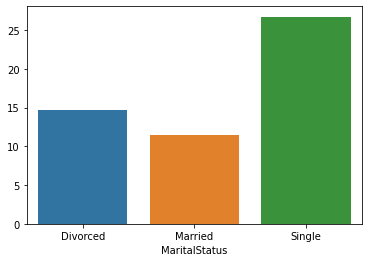

In [80]:
sns.barplot(x = res.index, y = res.values)

In [113]:
len(dt.columns)

21

percent churned per variable

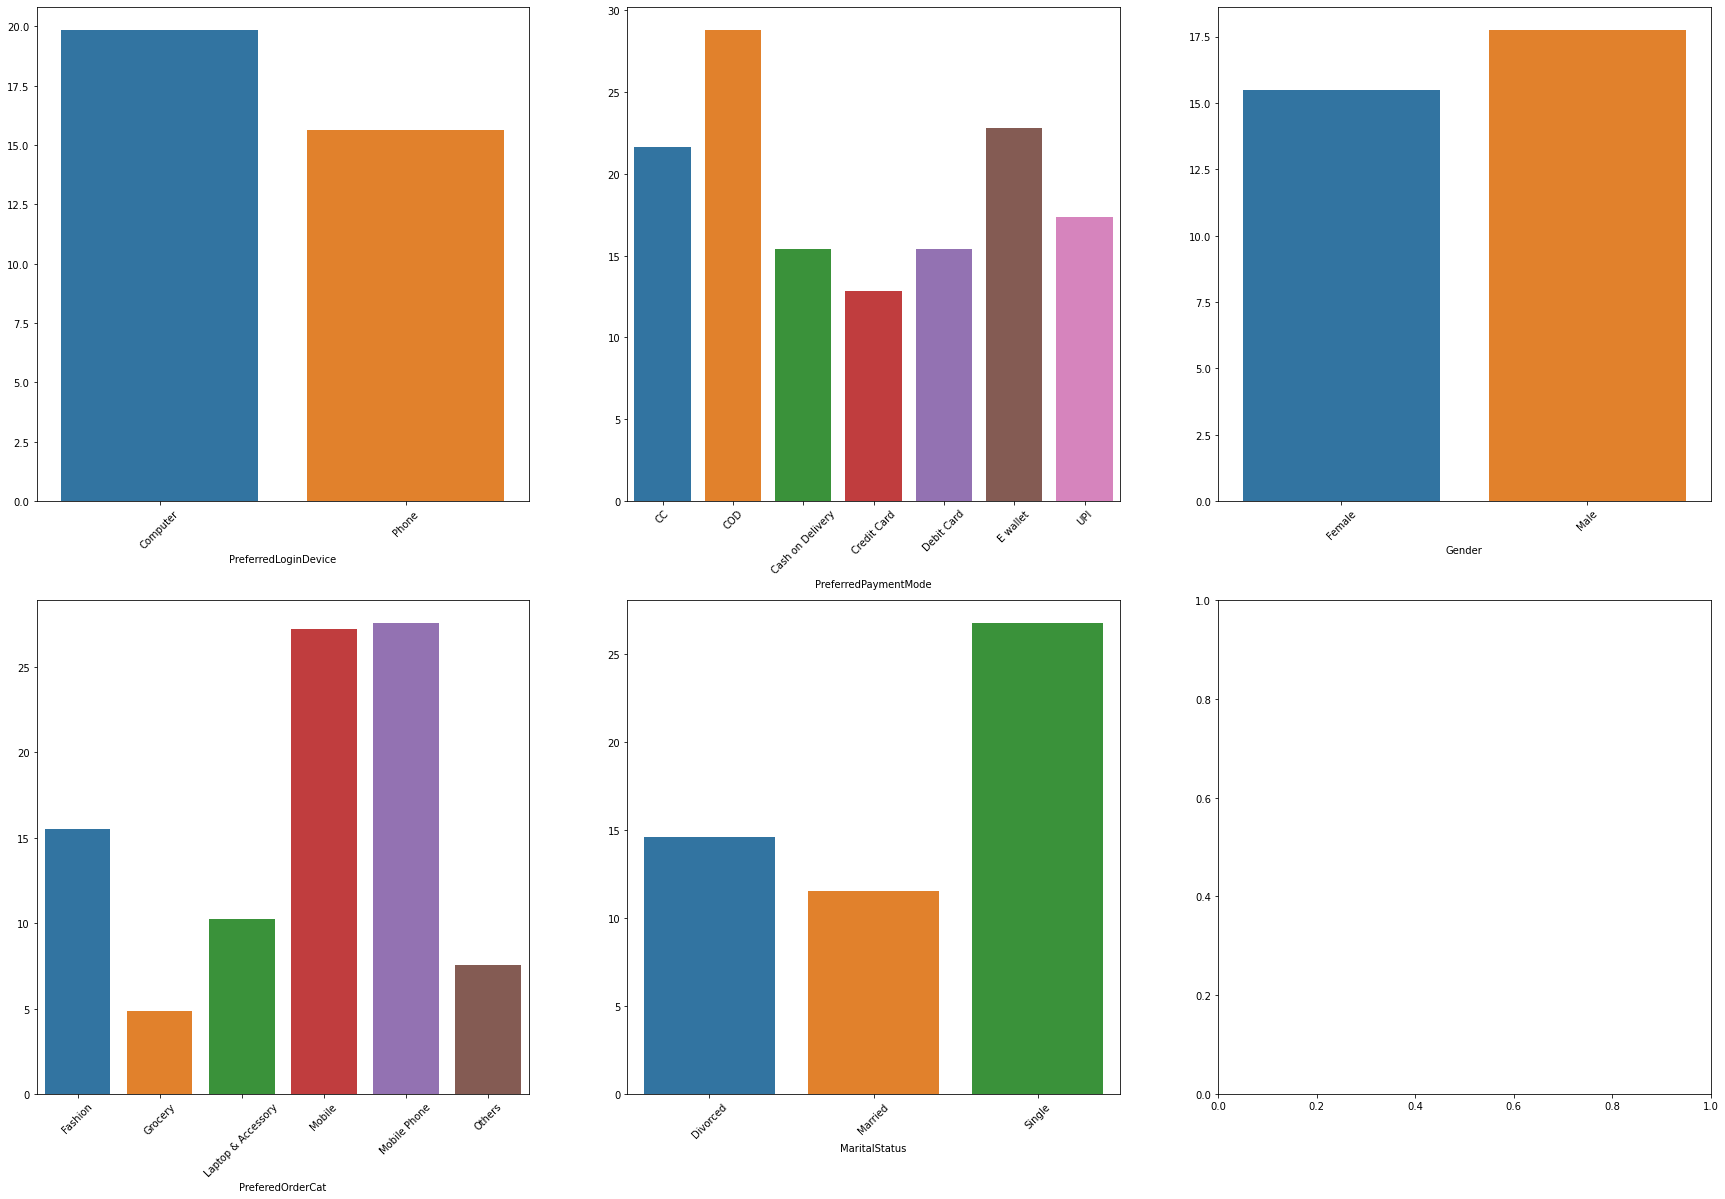

In [126]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for col,subplot in zip(cat, ax.flatten()):
    temp = dt.groupby(by=dt[col]).Churn.sum()
    total = dt.value_counts(col).sort_index()
    res1 = temp/total*100
    sns.barplot(x = res1.index, y = res1.values, ax=subplot)
    subplot.tick_params(axis='x',labelrotation=45)
    #plt.show()
    

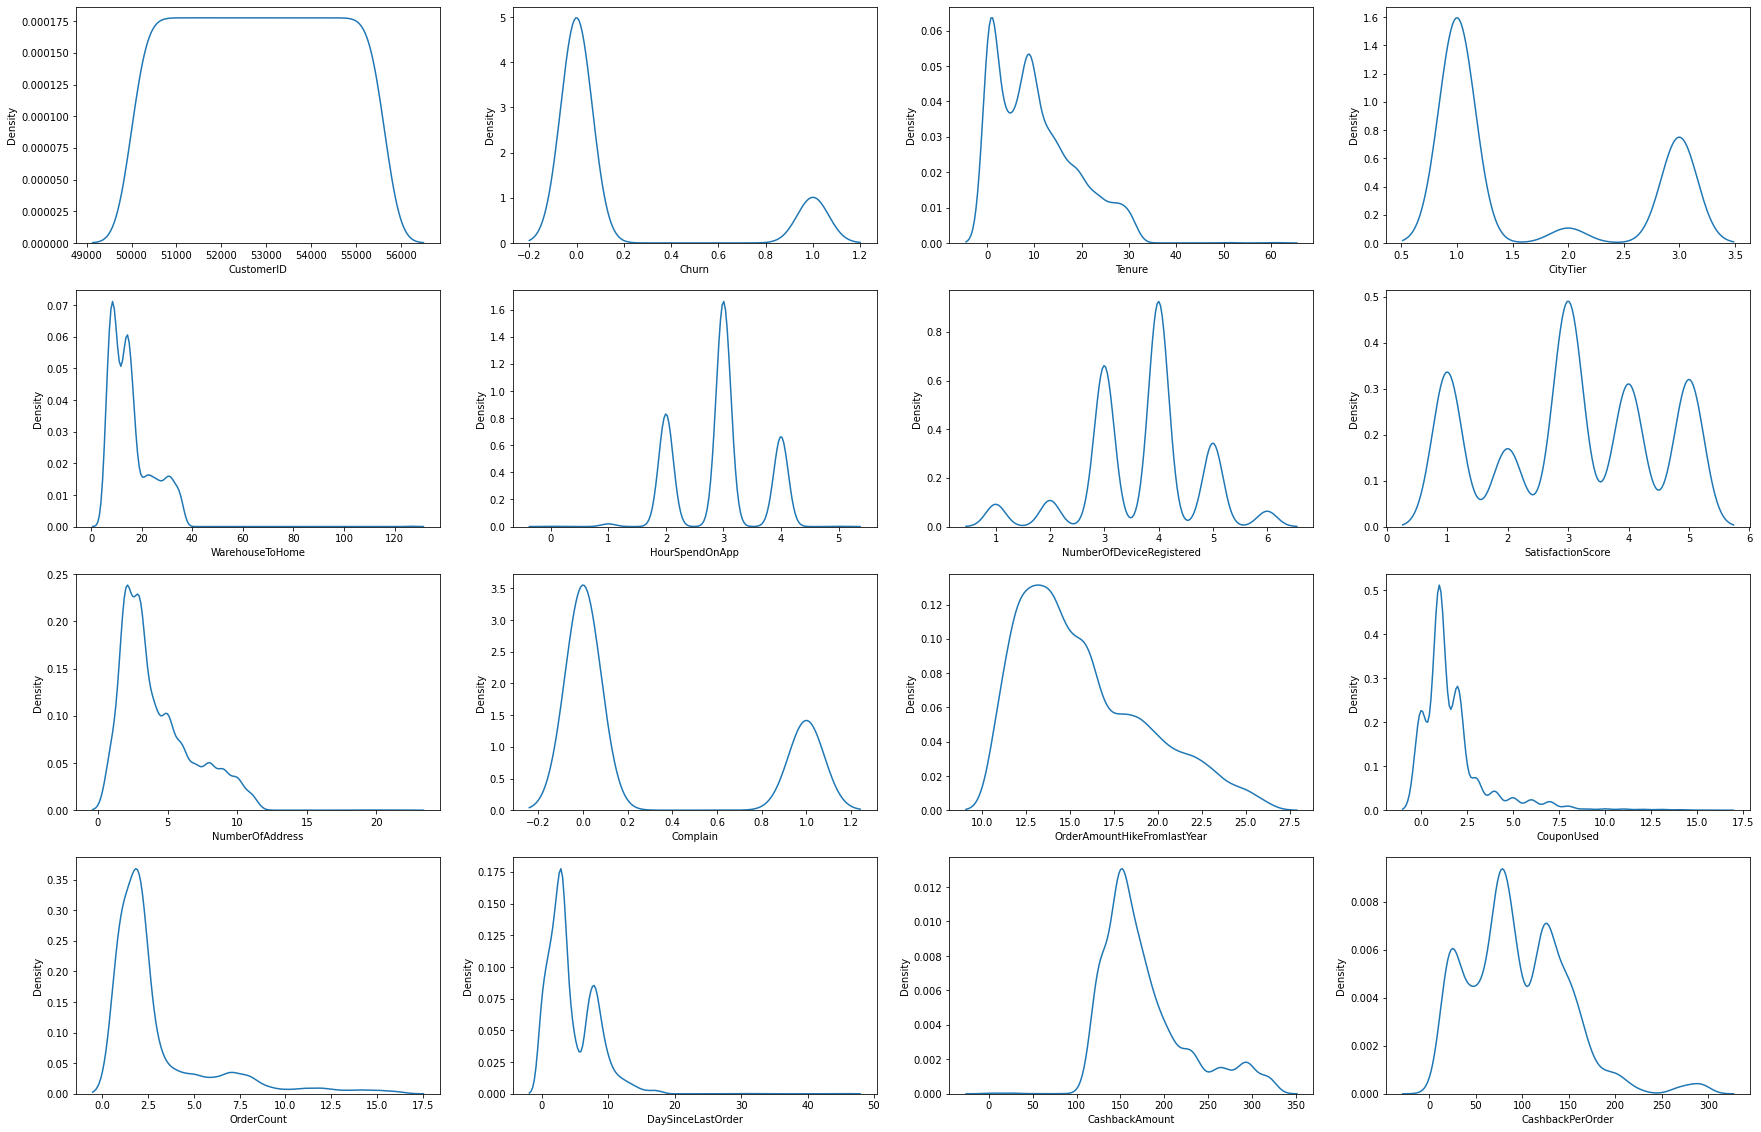

In [103]:
fig, ax = plt.subplots(4, 4, figsize=(30, 20))
for i, subplot in zip(num, ax.flatten()):
    sns.kdeplot(df[i], ax=subplot)

Bivariate Analysis

In [137]:
dt.drop('CustomerID', axis=1,inplace=True)

<AxesSubplot:>

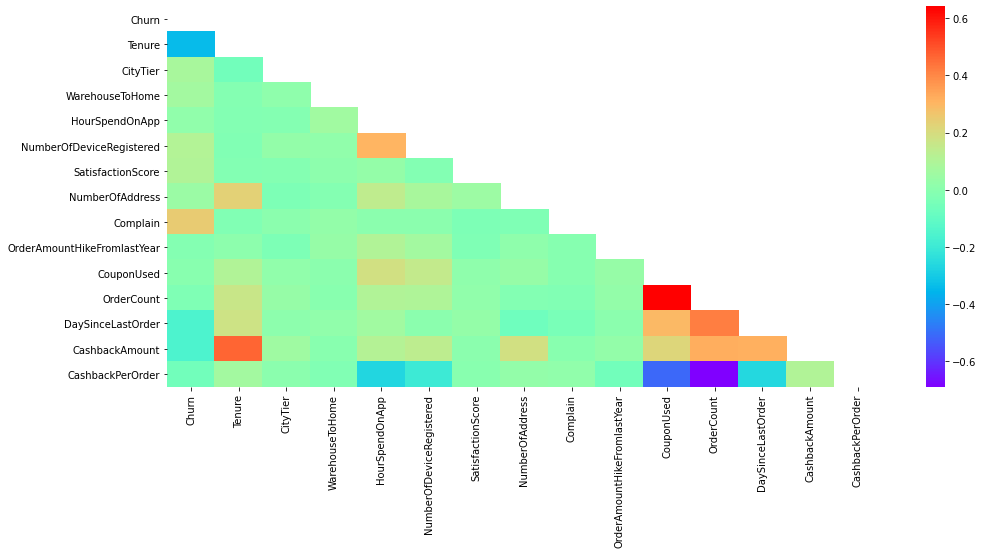

In [141]:
mask=np.zeros_like(dt.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(dt.corr(), mask=mask, cmap='rainbow')

<AxesSubplot:xlabel='OrderCount', ylabel='CouponUsed'>

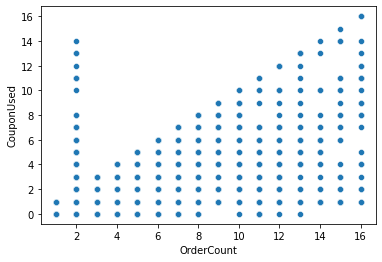

In [142]:
sns.scatterplot(x=dt.OrderCount, y=dt.CouponUsed)